<a href="https://colab.research.google.com/github/Keerthanabs1326/Elewayte-keerthana-/blob/main/keer6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("/content/CVD_cleaned.csv")
categorical_cols = [
    "General_Health","Checkup","Exercise","Heart_Disease","Skin_Cancer","Other_Cancer","Depression",
    "Diabetes","Arthritis","Sex","Age_Category","Height_(cm)","Weight_(kg)","BMI","Smoking_History",
    "Alcohol_Consumption","Fruit_Consumption","Green_Vegetables_Consumption","FriedPotato_Consumption"
]
df_encoded = pd.get_dummies(df)
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

In [ ]:
X = df.drop("General_Health", axis=1)
y = df["General_Health"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

I have included Linear SVC beacuse it was taking more time to fit to the model

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
lin_svc = LinearSVC()
lin_svc.fit(X_train_scaled, y_train)
svc_pred = lin_svc.predict(X_test_scaled)
acc1=accuracy_score(y_test, svc_pred)
print("SVC Accuracy:", acc1)

SVC Accuracy: 0.4170565475708666


In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)
acc2=accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", acc1)

Logistic Regression Accuracy: 0.42555568146865036


In [ ]:
from sklearn.ensemble import RandomForestClassifier as Random_Forest_Classifier
rf = Random_Forest_Classifier()
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
acc3=accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", acc2)

Random Forest Accuracy: 0.40619384500817535


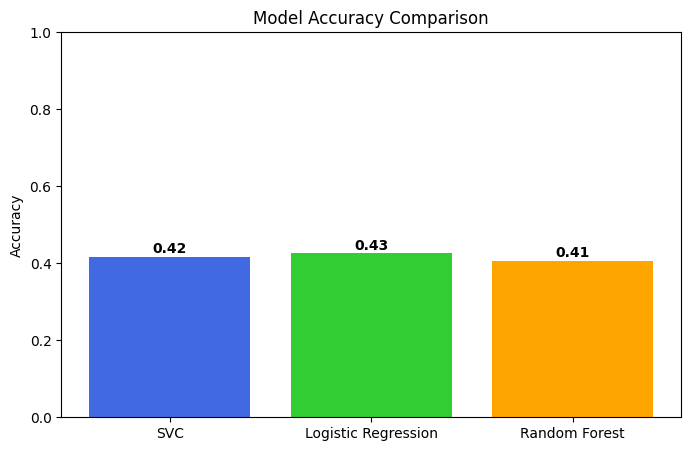

In [ ]:
import matplotlib.pyplot as plt
acc1 = 0.4170565475708666
acc2 = 0.425555568146865036
acc3 = 0.40619384500817535
models = ['SVC', 'Logistic Regression', 'Random Forest']
accuracies = [acc1, acc2, acc3]
plt.figure(figsize=(8,5))
bars = plt.bar(models, accuracies, color=['royalblue', 'limegreen', 'orange'])
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{acc:.2f}", ha='center', fontweight='bold')

plt.show()